In [2]:
import os, glob, shutil, cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [45]:
#find videos
print(f'Current directory: {os.getcwd()}')

path_to_videos = glob.glob(os.path.join('Videos','*.avi'))
print(path_to_videos, '-'*10, sep = '\n')
#create required directories
def makefolders(path):
    folder = os.path.split(path) #create folders for extracting all images
    folder = os.path.splitext(folder[-1])
    folder_create = os.path.join('Videos',folder[0])
    if os.path.exists(folder_create) == False:
        os.mkdir(folder_create)
    else:
        pass
    return folder_create

#navigate into folder for the image and save images
def saveimages(path, dir_name):
    cam = cv2.VideoCapture(path)
    count, success = 0, True
    video_index = []
    while success:
        success, image = cam.read()
        if not cam.isOpened():
            print(f"Error: Could not open video file {path}")
        os.chdir(dir_name)
        if success:
            folder = os.path.split(dir_name)
            frame = f'{folder[-1]}_frame_{count:02}.jpg'
            if os.path.exists(frame) == False:
                cv2.imwrite(frame, image)
                video_index.append(frame)
                count+=1
            else:
                print(f'Image {folder[-1]}_frame_{count:02}.jpg already exists, skipping save')
                video_index.append(frame)
                count+=1
        else:
            print('Image failed to save/No image present. End of file')
        os.chdir(os.path.join('..','..'))
    cam.release()
    print(f'Current directory: {os.getcwd()} \n Completed {path}\n--------------------')
    return video_index

def hill_eqn(c,K,n): #c concentration, K constant, n Hill coefficient
    lnc = np.log(c)
    x = K*np.exp(-n*lnc)
    E = 1/(1+x)
    return E #E is effect



Current directory: /Users/justinyew/Documents/GitHub/AppChallenge2273-2024/Project
['Videos/XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h.avi', 'Videos/XtremeStr-li1.5ug_biotin_no drug_live_5min45min.avi', 'Videos/0.5ugDNA_drug10uM_5min45min_1.avi', 'Videos/LipoKDEL1ug_biotin_no drug_live_5min1h.avi', 'Videos/0.75ugDNA_drug10uM_5min45min_1.avi', 'Videos/1ugDNA_drug10uM_5min45min_1.avi', 'Videos/LipoKDEL1ug_biotin_drug25uM_live_5min1h.avi']
----------


In [46]:
video_indexes = []
folder_indexes = []
for path in path_to_videos:
    dir_name = makefolders(path)
    folder_indexes.append(dir_name)
    video_indexes.append(saveimages(path, dir_name))

Image XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h_frame_00.jpg already exists, skipping save
Image XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h_frame_01.jpg already exists, skipping save
Image XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h_frame_02.jpg already exists, skipping save
Image XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h_frame_03.jpg already exists, skipping save
Image XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h_frame_04.jpg already exists, skipping save
Image XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h_frame_05.jpg already exists, skipping save
Image XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h_frame_06.jpg already exists, skipping save
Image XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h_frame_07.jpg already exists, skipping save
Image XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h_frame_08.jpg already exists, skipping save
Image XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h_frame_09.jpg already exists, skipping save
Image XtremeStr-li1.5ug_biotin_drug50uM_live_5min1

Videos/XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h


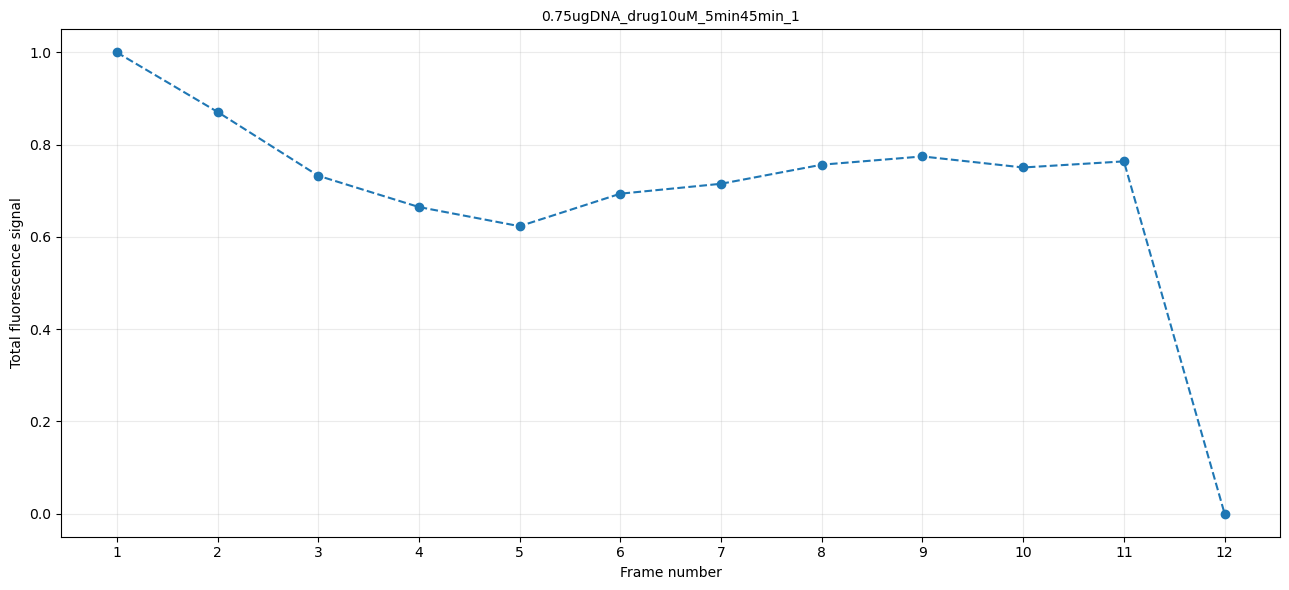

Videos/XtremeStr-li1.5ug_biotin_no drug_live_5min45min


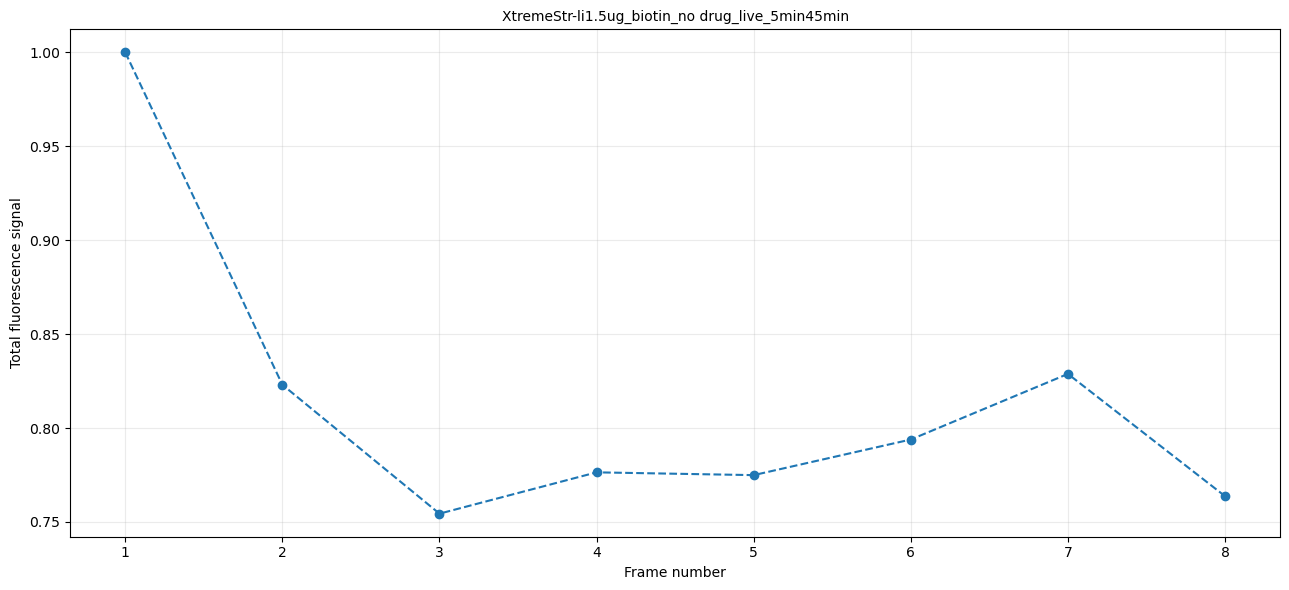

Videos/0.5ugDNA_drug10uM_5min45min_1


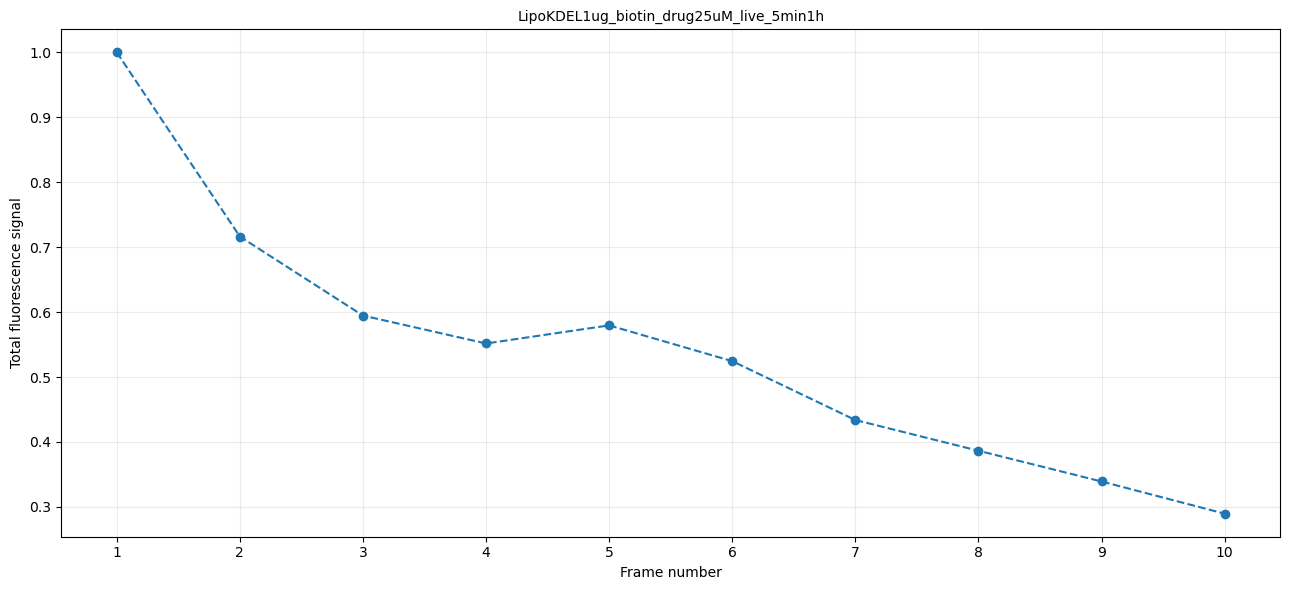

Videos/LipoKDEL1ug_biotin_no drug_live_5min1h


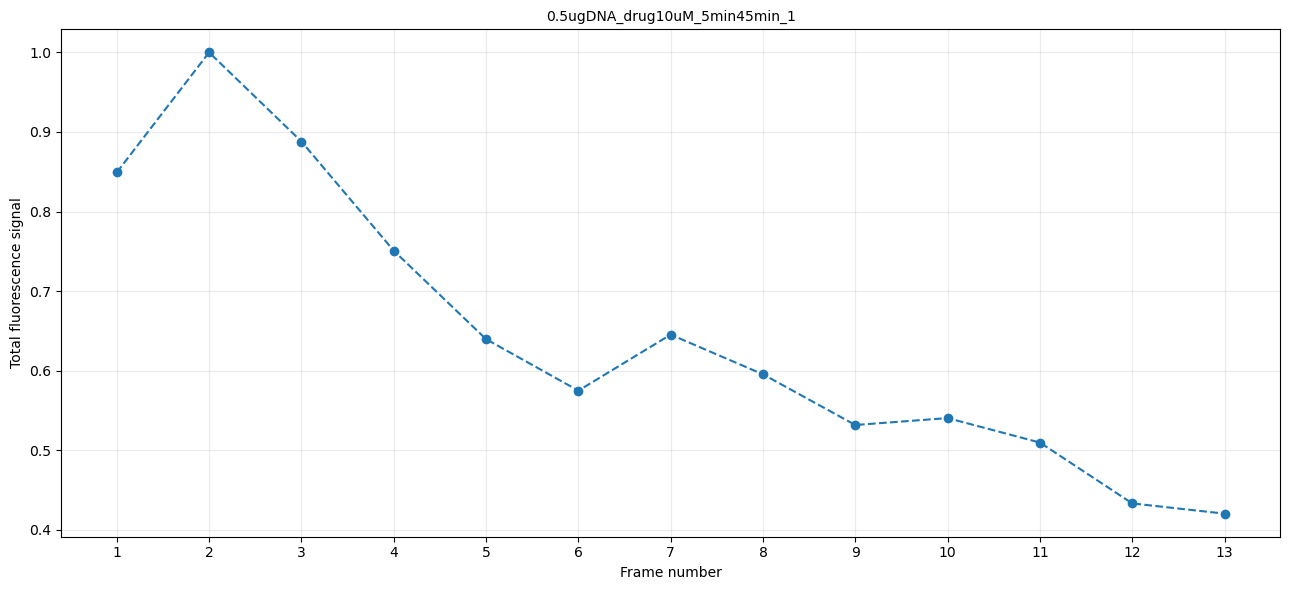

Videos/0.75ugDNA_drug10uM_5min45min_1


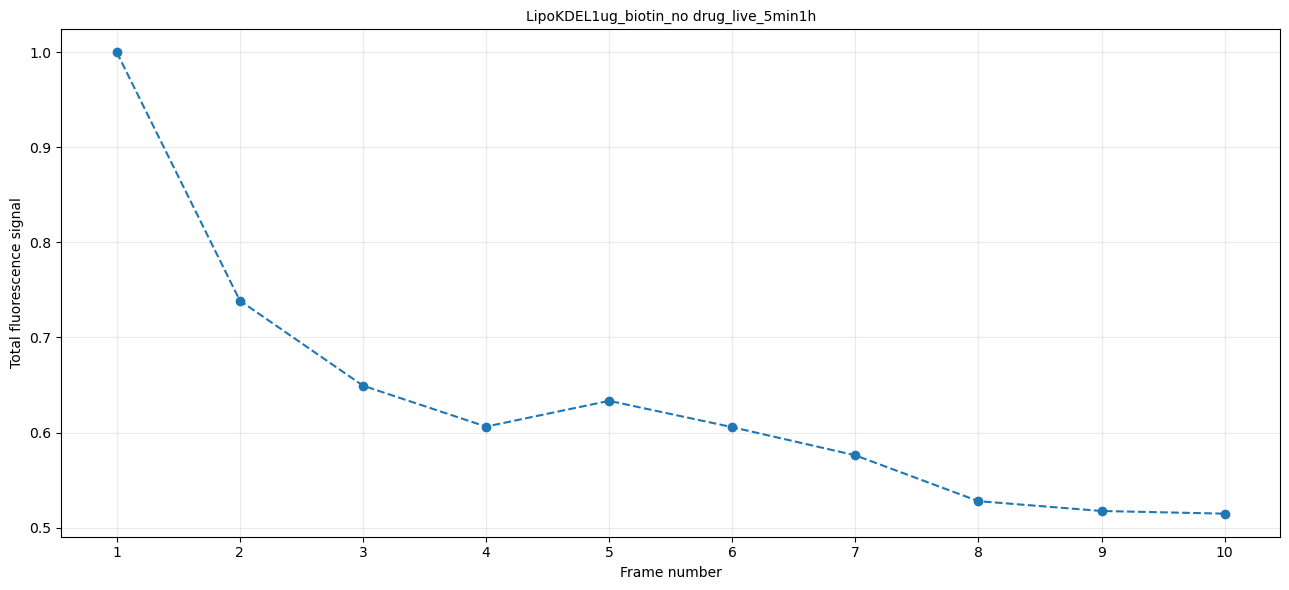

Videos/1ugDNA_drug10uM_5min45min_1


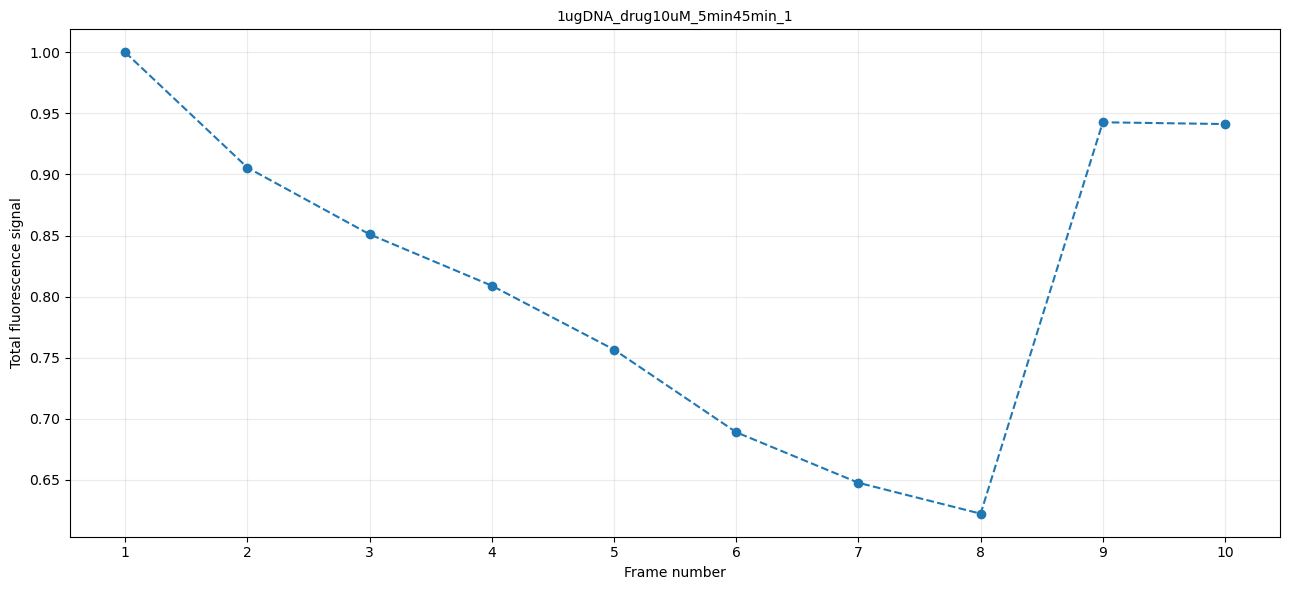

Videos/LipoKDEL1ug_biotin_drug25uM_live_5min1h


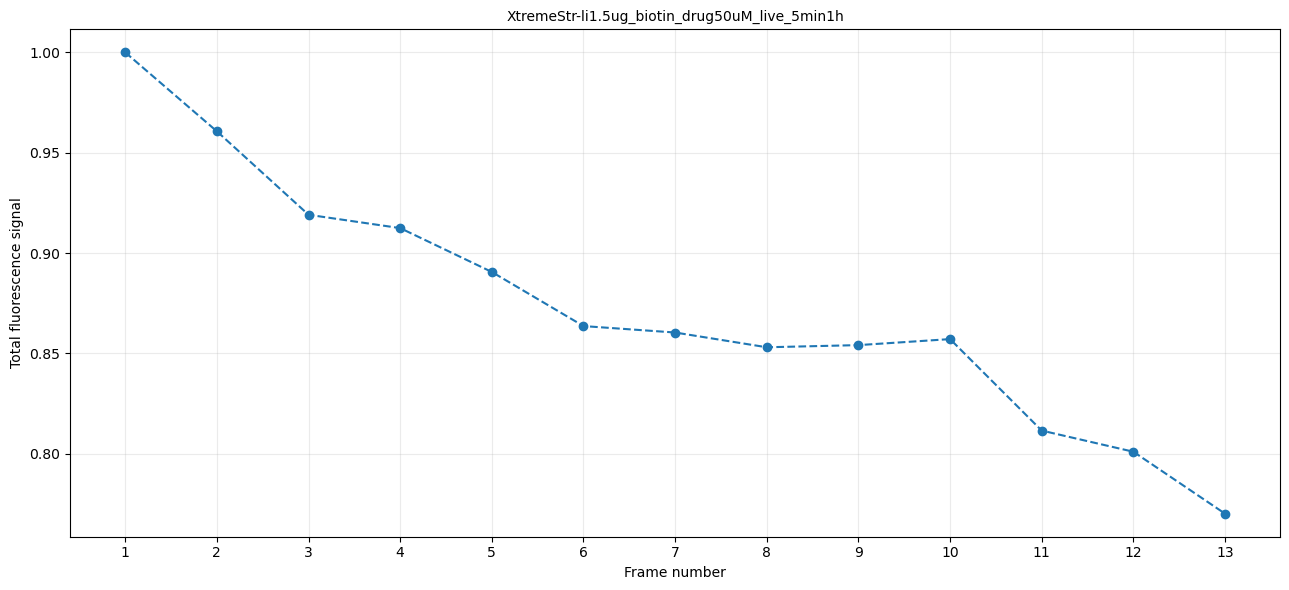

In [52]:
cwd = os.getcwd() #getting current working directory


temp = glob.glob(os.path.join(cwd, 'Videos', '*')) #in my current working directory, access videos folder and list me all the files inside
video_folders = [file for file in temp if not file.endswith(".avi")] #using list comprehension. access the files inside temp, isolate the files with '.avi', and exclude it. store as video_folders


def singular_video(folder_path, image_order): #creating a function called singular_video, to loop through the 7 different folders.
    total_fluorescence = [] #empty list to add the max fluoresence later and plot
    subdir_path = os.path.join(cwd, folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in image_order:
            img_path = os.path.join(subdir_path, img)
            if img.lower().endswith(('.jpg')): #filter for only .jpg files inside subdir_path
                # print(img_path)
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_gray = rgb2gray(a) #converting the img into grayscale
                total_fluorescence.append(img_gray.sum()) #sum up signal inside individual frames and append into total_fluorascence

    else:
        print(f'Subdirectory {video_folders} not found')
    return total_fluorescence #return here so can use in "histogrammer" function

def sorting_images(video_path):
    #this is a test program that may be required for mac devices, to ensure that readout is in the correct order
    return indexes

def histogrammer(video1, i):
    video1_normalise = video1/max(video1) #normalising to highest sum fluorescent signal in the frames.
    name = os.path.split(video_folders[i])
    x = range(1, len(video1)+1) #plotting frame 1 - n+1

    #plotting segment
    plt.figure(figsize = (13, 6)) #setting the figure size, has to be before plt.plot
    plt.plot(x, video1_normalise, linestyle = 'dashed', marker = 'o') #marker is the data point, marked as circle.

    #Labels & aesthetics
    plt.xticks(x) #this makes it show every tick in X axis
    plt.xlabel('Frame number', fontsize = 10)
    plt.ylabel('Total fluorescence signal', fontsize = 10)
    plt.grid(alpha = .25)
    plt.title(name[1], fontsize = 10)

    plt.tight_layout() #trying out
    plt.show()

#calling of the functions to do all the dirty work
for i, folder in enumerate(folder_indexes): #for index inside folder, count
    print(folder)
    video1 = singular_video(folder, video_indexes[i]) #isolate the single videos and split into frames, save as video1
    histogrammer(video1, i) #store the list of fluorescence signals as video1 and plot histogram



In [9]:
print(video_folders)
#how do i even choose this lol 
#for now, hard code, then maybe in future can soft code it?

['C:\\Users\\Admin\\Documents\\GitHub\\AppChallenge2273-2024\\Project\\Videos\\0.5ugDNA_drug10uM_5min45min_1', 'C:\\Users\\Admin\\Documents\\GitHub\\AppChallenge2273-2024\\Project\\Videos\\0.75ugDNA_drug10uM_5min45min_1', 'C:\\Users\\Admin\\Documents\\GitHub\\AppChallenge2273-2024\\Project\\Videos\\1ugDNA_drug10uM_5min45min_1', 'C:\\Users\\Admin\\Documents\\GitHub\\AppChallenge2273-2024\\Project\\Videos\\LipoKDEL1ug_biotin_drug25uM_live_5min1h', 'C:\\Users\\Admin\\Documents\\GitHub\\AppChallenge2273-2024\\Project\\Videos\\LipoKDEL1ug_biotin_no drug_live_5min1h', 'C:\\Users\\Admin\\Documents\\GitHub\\AppChallenge2273-2024\\Project\\Videos\\XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h', 'C:\\Users\\Admin\\Documents\\GitHub\\AppChallenge2273-2024\\Project\\Videos\\XtremeStr-li1.5ug_biotin_no drug_live_5min45min']


[0.57688822 2.07177289]


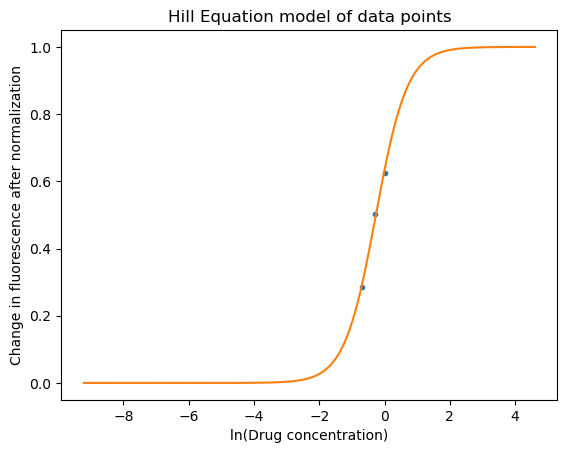

In [54]:
def fluorescence_change(data):
    data_norm = data/max(data)
    change = min(data_norm)
    return change

drug_variation = video_folders[0:3]
drugconc = np.array([0.5,0.75,1.])
Ki, ni = 1,1
effect = [fluorescence_change(singular_video(video)) for video in drug_variation]
x = np.arange(1,len(effect)+1)
plt.plot(np.log(drugconc), effect, '.')

popt, pcov = curve_fit(hill_eqn, drugconc, effect, p0 = (Ki, ni))
print(popt)
predict_data = np.arange(1e-4,100,1e-2)
plt.plot(np.log(predict_data), hill_eqn(predict_data,popt[0],popt[1]))
plt.title('Hill Equation model of data points')
plt.ylabel('Change in fluorescence after normalization',rotation = 90)
plt.xlabel('ln(Drug concentration)')
# plt.text(0,1,r'y = $\dfrac{1}{1+Ke^{-n\mathrm{ln(drug concentration)}}$')
plt.show()

y = $\dfrac{1}{1+Ke^{-n\mathrm{ln(drug concentration)}}$

$y=\dfrac{x}{y}$

In [81]:
def dEdn(c,K,n):
    a = n * np.log(c)
    b = K * np.exp(-a)
    bi = b**2
    # print(bi,b)
    result = (b * np.log(c))/bi
    return result

def dEdK(c,K,n):
    a = -n * np.log(c)
    A = np.exp(a)
    b = (1+K*A)**2
    result = (-A)/b
    return result

def logistics(c,K,n,E_actual):
    b = 1/len(c)
    yp = hill_eqn(c,K,n)
    x = E_actual/yp
    x1 = (1-E_actual)/(1-yp)

    der_K = dEdK(c,K,n)
    der_n = dEdn(c,K,n)
    diff1 = b * np.sum(x * der_K - x1 * der_K)
    diff2 = b * np.sum(x * der_n - x1 * der_n)

    return diff1, diff2
    
def gradientDescent(Ki:float, ni:float, E_actual, c, max_iter:int=2500, tol:float = 1e-4, lr:float = 1e-6): #Ki and ni are initial guesses

    K = Ki
    n = ni
    for i in range(max_iter):
        diff1, diff2 = logistics(c,K,n,E_actual)
        diff1*= -lr
        diff2*= -lr

        if abs(diff1) < tol and abs(diff2) < tol:
            break
        
        K-=diff1
        n-=diff2

    return K, n, i

2.0037903060140567 0.5908302823268684 1507


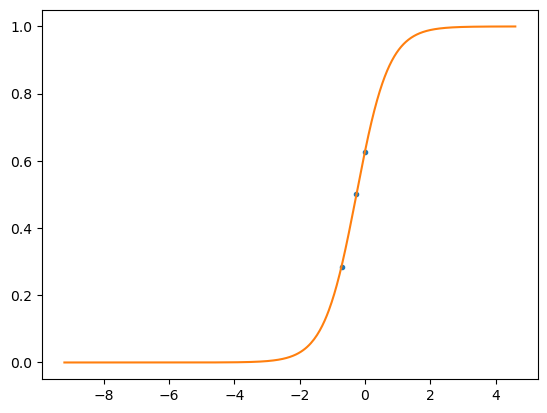

In [82]:
effect = np.array(effect)
Kp,n_p, i = gradientDescent(Ki = 2, ni = 2.5, E_actual = effect, tol = 1e-5, lr = 1e-1, c = drugconc)
print(n_p, Kp, i)
predicted_relation = hill_eqn(predict_data, Kp, n_p)
plt.plot(np.log(drugconc), effect,'.')
plt.plot(np.log(predict_data), predicted_relation)